In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [21]:
raw = pd.read_csv('../data/raw/UCI_Credit_Card.csv', index_col=0)
del raw.index.name
X = raw.drop('default.payment.next.month', axis=1)
y = raw['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

model = GaussianNB()
score = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
print 'GaussianNB: ', np.mean(score), '+-', np.std(score)

GaussianNB:  0.356499316234 +- 0.00975252026724


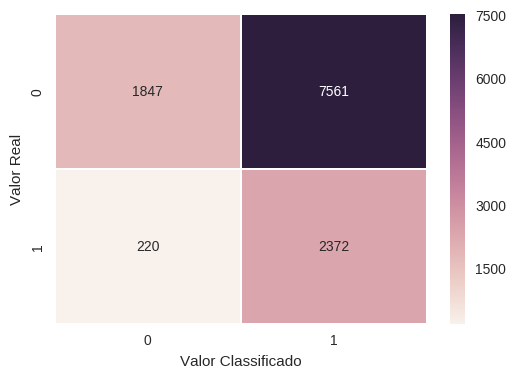

In [22]:
y_pred = model.fit(X_train,y_train).predict(X_test)
mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(mtx), annot=True, fmt="d", linewidths=.5)
plt.xlabel('Valor Classificado')
plt.ylabel('Valor Real')